In [ ]:
# Set the image size
image_size = (224, 224)

from keras.applications.vgg16 import VGG16
# Load the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
from keras.applications.vgg16 import preprocess_input
# Extract features from images
X = []
y = []
dataset_dir = 'Data/cat_dog_train'
for file in os.listdir(dataset_dir):
    if file.endswith('.jpg'):
        label = file.split('.')[0]
        if label == 'dog':
            y.append(1)
        else:
            y.append(0)
        image = load_img(os.path.join(dataset_dir, file), target_size=image_size)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = preprocess_input(image)
        features = vgg_model.predict(image)
        features = features.flatten()
        X.append(features)
X = np.array(X)
y = np.array(y)

1/1 [==============================] - 1s 554ms/step


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the classifier
svm.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm.predict(X_test)
print(X_test.shape)
# Calculate the accuracy  
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

(276, 25088)
Accuracy: 0.9565217391304348


Saving dog.156.jpg to dog.156.jpg


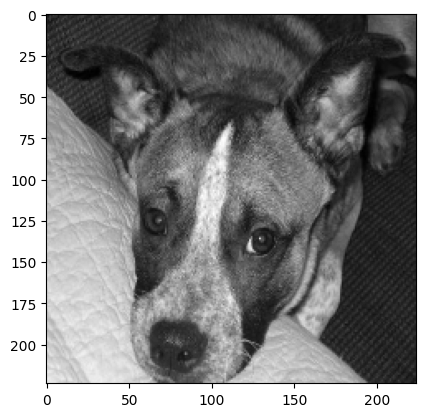

(1, 224, 224, 3)
1/1 [==============================] - 1s 577ms/step
The image is predicted to be a dog.


Saving cat.523.jpg to cat.523.jpg


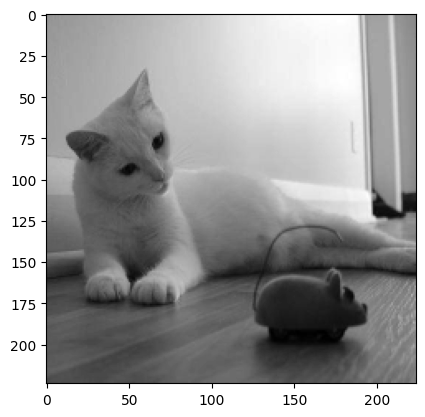

(1, 224, 224, 3)
1/1 [==============================] - 1s 584ms/step
The image is predicted to be a cat.


In [ ]:
import matplotlib.pyplot as plt
from google.colab import files 
import numpy as np
import cv2
# Prompt the user to upload files
uploaded_files = {}

for i in range(2):
  uploaded = files.upload()
  
  for file_name,file_content in uploaded.items():
    uploaded_files[file_name] = file_content
    file_array = np.frombuffer(uploaded_files[file_name], dtype=np.uint8)
    # Read the image using OpenCV
    image = cv2.imdecode(file_array, cv2.IMREAD_GRAYSCALE)
      
    # Resize the image to the desired shape
    resized_image = cv2.resize(image, (224, 224))
      
    # Display the resized image
    plt.imshow(resized_image, cmap='gray')
    plt.show()

    # Convert grayscale image to RGB
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)


    new_image = np.expand_dims(image_rgb, axis=0)
    new_image = preprocess_input(new_image)
    print(new_image.shape)
    # Extract features using VGG16
    features = vgg_model.predict(new_image)
    features = features.flatten()

    # Make prediction with SVM model
    svm_predict = svm.predict([features])

    # Print the prediction
    if svm_predict[0] == 1:
        print('The image is predicted to be a dog.')
    else:
        print('The image is predicted to be a cat.')
